In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

data = pd.read_csv('../input/udemy-courses/udemy_courses.csv')
data.drop(['course_id','url'], axis=1, inplace=True)

In [2]:
data['price'] = data['price'].str.replace('Free','0')
data['price'] = data['price'].str.replace('TRUE','0')        
data['price'] = data['price'].astype('int')

data['is_paid'] = data['is_paid'].replace('TRUE', 'True')
data['is_paid'] = data['is_paid'].replace('FALSE', 'False')
data['is_paid'] = data['is_paid'].replace('https://www.udemy.com/learnguitartoworship/', 'True')

# Which subject consist of most expensive courses?----> Web Development

In [3]:
subject = data.loc[:,['price', 'subject']]
subject['total_price'] = subject.groupby('subject')['price'].transform('sum')
subject.drop(['price'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('total_price')

fig = px.pie(subject, names='subject', values='total_price', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which subject has most free courses?-----> Web Development

In [4]:
subject = data.loc[data['is_paid']=='False', ['is_paid','subject']]
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')

fig = px.pie(subject, names='subject', values='count', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of price

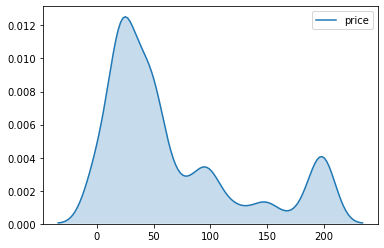

In [5]:
sns.kdeplot(data=data['price'], label='price', shade=True)

# Which subject have most paid courses?-----> Business Finance

In [6]:
subject = data.loc[data['is_paid']=='True', ['is_paid','subject']]
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')

fig = px.pie(subject, names='subject', values='count', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of number of subscribers

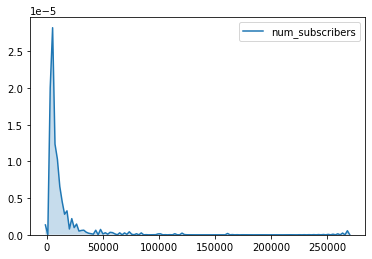

In [7]:
sns.kdeplot(data=data['num_subscribers'], label='num_subscribers', shade=True)

# Which course have most subscribers?-----> Learn HTML5 Programming from Scratch

In [8]:
course = data.loc[:, ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].max().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.head()

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which course have least subscribers? ----> Something out of my dictionary

In [9]:
course = data.loc[(data['num_subscribers']>100), ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].min().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.tail()

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()